In [7]:
import pandas as pd
import numpy as np


In [8]:
df = pd.read_csv('data.csv')
df

,feature1,feature2,feature3,target
0,5,14,2,0
1,5,13,4,1
2,6,6,2,1
3,9,13,5,1
4,10,3,5,1
5,5,3,7,0
6,8,9,6,1
7,2,3,5,1
8,4,12,4,0
9,4,11,6,1


In [10]:
import plotly.express as px

px.scatter_3d(df,x=df['feature1'],y=df['feature2'],z=df['feature3'],color=df['target'])

##Step 1 - Apply standard scaling


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df.iloc[:,0:3] = scaler.fit_transform(df.iloc[:,0:3])

## Step 2 - Find Covariance Matrix


In [22]:
df.isnull().sum()

feature1    0
feature2    0
feature3    0
target      0
dtype: int64

In [26]:
covariance_matrix = np.cov(m = df.iloc[:,0], y = [df.iloc[:,1],df.iloc[:,2]])
covariance_matrix

array([[1.02564103, 0.10487393, 0.1743118 ],
       [0.10487393, 1.02564103, 0.24916855],
       [0.1743118 , 0.24916855, 1.02564103]])

## Step 3 - Finding EV and EVs


In [28]:
eigen_values,eigen_vectors = np.linalg.eig(covariance_matrix)

In [29]:
eigen_values ,eigen_vectors

(array([1.38459425, 0.92882365, 0.76350517]),
 array([[ 0.48564178,  0.83640817, -0.25411304],
        [ 0.58977454, -0.5280676 , -0.61099149],
        [ 0.64522713, -0.14685359,  0.74974393]]))

###3D data but transformed

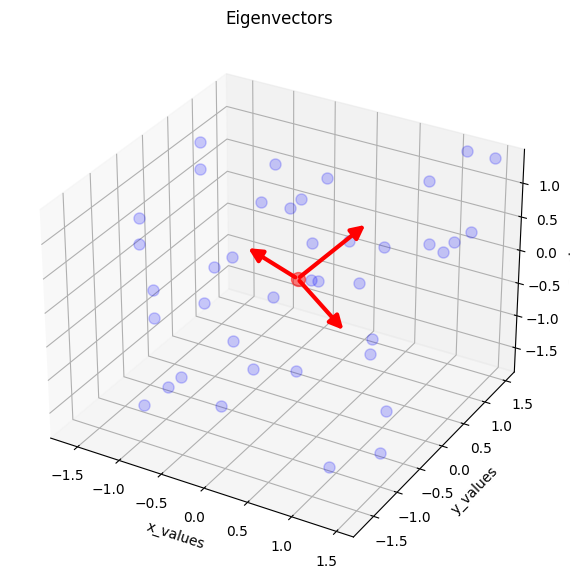

In [43]:

import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        super().__init__((0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))

        return np.min(zs)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(df['feature1'], df['feature2'], df['feature3'], 'o', markersize=8, color='blue', alpha=0.2)
ax.plot([df['feature1'].mean()], [df['feature2'].mean()], [df['feature3'].mean()], 'o', markersize=10, color='red', alpha=0.5)
for v in eigen_vectors.T:
    a = Arrow3D([df['feature1'].mean(), v[0]], [df['feature2'].mean(), v[1]], [df['feature3'].mean(), v[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()


In [48]:
pc = eigen_vectors[0:2] #pricipal components
pc

array([[ 0.48564178,  0.83640817, -0.25411304],
       [ 0.58977454, -0.5280676 , -0.61099149]])

In [50]:
transformed_df = np.dot(df.iloc[:,0:3],pc.T)

In [54]:
new_df = pd.DataFrame(transformed_df,columns=['PC1','PC2'])

In [55]:
new_df['target'] = df['target']

In [58]:
new_df.head()

,PC1,PC2,target
0,1.460103,-0.210630,0
1,1.050372,-0.576661,1
2,-0.022466,1.000398,1
3,1.543450,-0.100297,1
4,-0.347009,1.368253,1


###New formed 2D  

In [59]:
new_df['target'] = new_df['target'].astype('str')
fig = px.scatter(x=new_df['PC1'],
                 y=new_df['PC2'],
                 color=new_df['target'],
                 color_discrete_sequence=px.colors.qualitative.G10
                )

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()